# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Dede Husen
- Email:adehusen@gmail.com
- Id Dicoding:dhe_zhen

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from joblib import dump
import seaborn as sns
from sklearn.metrics import confusion_matrix

Mengimport librari yang akan dibutuhkan

### Menyiapkan data yang akan digunakan

In [2]:
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv"
df = pd.read_csv(url, delimiter=';')
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


data Diatas diambil dari repositori dicoding dengan format .csv, Dalam tabel dataframe diatas juga kita bisa melihat gambaran datanya seperti apa

## Data Understanding

###Menyiapkan pertanyaan bisnis
1. Berapakah persentase tingkat dropout, graduate dan enroll?
2. Apakah ada hubungan antara status pembayaran biaya kuliah (Tuition_fees_up_to_date) dengan performa akademik mahasiswa (grade/approval)?
3. Bagaimana peran umur saat mendaftar (Age_at_enrollment) terhadap keberhasilan akademik mahasiswa?
4. Apakah mahasiswa penerima beasiswa (Scholarship_holder) cenderung memiliki performa akademik yang lebih baik?
5. Apakah latar belakang orang tua (education/occupation) memengaruhi performa akademik atau kelulusan mahasiswa?
6. Apa faktor-faktor yang paling berpengaruh terhadap keberhasilan mahasiswa menyelesaikan studi (Status)?

Pada bagian ini kita mempersiapkan terlebih dahulu pertanyaan bisnis yang akan kita gali, dengan melakukan Exploratory Data Analisis untuk melihat insigh dari data dan menjawab pertanyaan bisnis tersebut

### Ekpsploratory Data Analisis

In [3]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Kita dapat melihat gambaran isi dari data tersebut

In [4]:
df.isnull().sum()

,0
Marital_status,0
Application_mode,0
Application_order,0
Course,0
Daytime_evening_attendance,0
Previous_qualification,0
Previous_qualification_grade,0
Nacionality,0
Mothers_qualification,0
Fathers_qualification,0


Berdasarkan hasil pengecekan, tidak terdapat baris data yang kosong

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Terdapat Tipe data Numerik = Float64(7), int64(29) Kategorikal = object(1)

In [6]:
df.describe(include='all')

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Graduate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2209
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,NaN
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,NaN
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,NaN
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,NaN
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,NaN
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,NaN


Pada bagian ini kita dapat melihat statistik data seperti total baris data, min, max, mean, standar deviasi dan lainnya

In [7]:
duplikasi_data = df.duplicated().sum()
print(f"Jumlah duplikasi data: {duplikasi_data}")

Jumlah duplikasi data: 0


Hasil dari pengecekan tidak terdapat duplikasi data.

In [8]:
for col in df.columns:
  print(f"Column '{col}': {df[col].nunique()} unique values")

Column 'Marital_status': 6 unique values
Column 'Application_mode': 18 unique values
Column 'Application_order': 8 unique values
Column 'Course': 17 unique values
Column 'Daytime_evening_attendance': 2 unique values
Column 'Previous_qualification': 17 unique values
Column 'Previous_qualification_grade': 101 unique values
Column 'Nacionality': 21 unique values
Column 'Mothers_qualification': 29 unique values
Column 'Fathers_qualification': 34 unique values
Column 'Mothers_occupation': 32 unique values
Column 'Fathers_occupation': 46 unique values
Column 'Admission_grade': 620 unique values
Column 'Displaced': 2 unique values
Column 'Educational_special_needs': 2 unique values
Column 'Debtor': 2 unique values
Column 'Tuition_fees_up_to_date': 2 unique values
Column 'Gender': 2 unique values
Column 'Scholarship_holder': 2 unique values
Column 'Age_at_enrollment': 46 unique values
Column 'International': 2 unique values
Column 'Curricular_units_1st_sem_credited': 21 unique values
Column 'C

dari hasil penghitungan diatas, kita dapat melihat jumlah value unik disetiap kolomnya

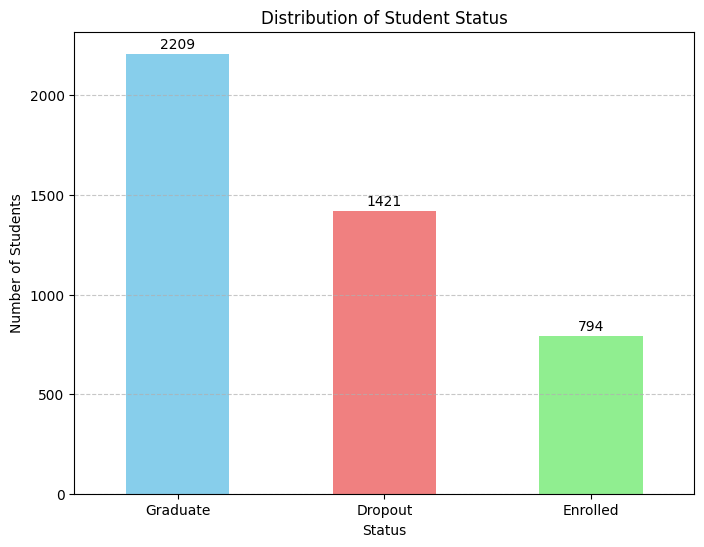

In [9]:
status_counts = df['Status'].value_counts()
plt.figure(figsize=(8, 6))
# Assign the Axes object returned by plot to 'ax'
ax = status_counts.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Student Status')
plt.xlabel('Status')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(status_counts):
    # Now 'ax' is defined and refers to the Axes object
    ax.text(i, v + 10, str(v), ha='center', va='bottom') # Adjust the +10 for label position

plt.show()

Dari hasil visualisasi diatas kita bisa melihat total distribusi status mahasiswa dimana terdapat 2209 mahasiswa dengan status ```graduate``` 1421 status mahasiswa ```**dropout**``` dan 794 mahasiswa dengan status ```enrolled```

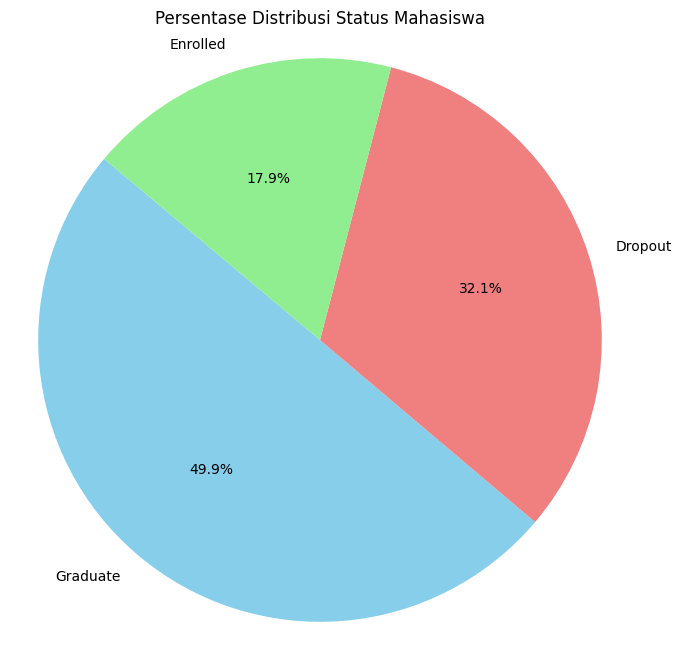

In [10]:
# Hitung jumlah data untuk setiap kategori pada kolom 'Status'
status_counts = df['Status'].value_counts()

# Buat visualisasi pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Persentase Distribusi Status Mahasiswa')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Berdasarkan hasil persentase grafik diatas kita dapat melihat bahwa terdapat 49.9% mahasiswa dengan status ```graduate``` 32.1% mahasiswa ```dropout``` dan 17.9% mahasiswa dengan status ```enrolled``` data tersebut sekaligus menjawab pertanyaan **nomor 1**

<Figure size 1000x600 with 0 Axes>

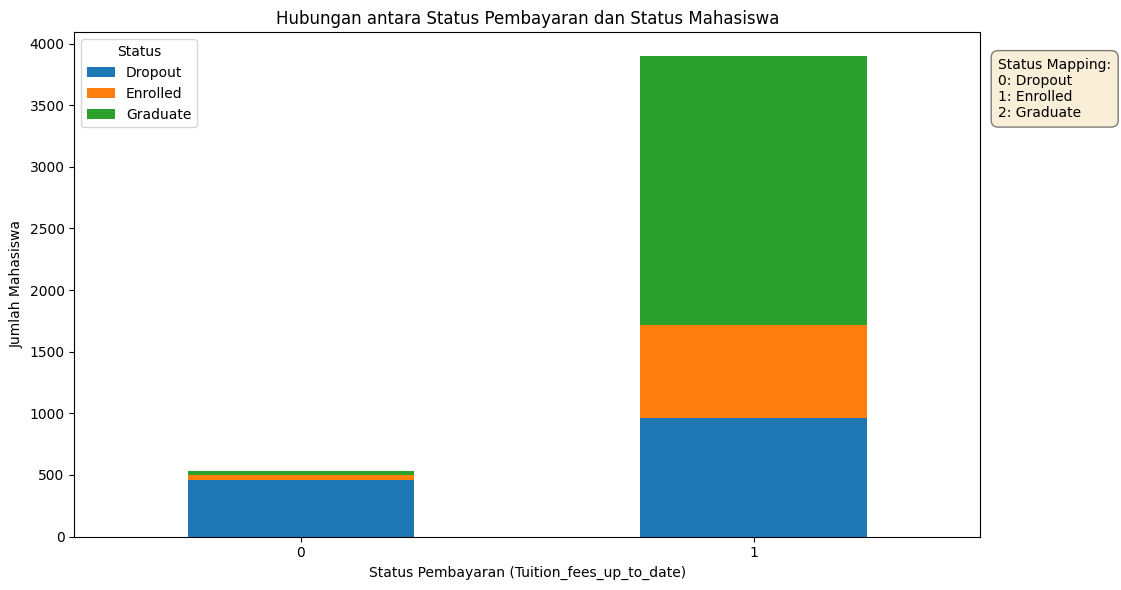

Korelasi antara Keterlambatan Pembayaran (Tuition_fees_up_to_date) dan Status: 0.4098267546786886


In [11]:
# Visualisasi hubungan antara 'Tuition_fees_up_to_date' dan 'Status'
plt.figure(figsize=(10, 6))
ax = pd.crosstab(df['Tuition_fees_up_to_date'], df['Status']).plot(kind='bar', stacked=True, figsize=(10, 6)) # Assign plot to an axes object
plt.title('Hubungan antara Status Pembayaran dan Status Mahasiswa')
plt.xlabel('Status Pembayaran (Tuition_fees_up_to_date)')
plt.ylabel('Jumlah Mahasiswa')
plt.xticks(rotation=0)
plt.legend(title='Status')
plt.tight_layout()

# Add text annotation for the mapping
annotation_text = "Status Mapping:\n0: Dropout\n1: Enrolled\n2: Graduate"
plt.text(1.02, 0.95, annotation_text, transform=ax.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

plt.show()


from sklearn.preprocessing import LabelEncoder
status_encoder = LabelEncoder()
df['Status_encoded'] = status_encoder.fit_transform(df['Status'])

# Now calculate the correlation using the potentially numerical 'Tuition_fees_up_to_date'
# and the newly encoded 'Status_encoded'
correlation = df['Tuition_fees_up_to_date'].corr(df['Status_encoded'])
print(f"Korelasi antara Keterlambatan Pembayaran (Tuition_fees_up_to_date) dan Status: {correlation}")

Berdasarkan visualisasi grafik diatas kita bisa melihat bahwa hubungan antara status pembayaran ```(tuition_fees_up_to_date)``` dengan ```status``` cukup berpengaruh dengan tingkat korelasi sebesar 0.409 meskipun tidak sampai terlalu besar, tapi jika dilihat dari total student yang dropout cukup tinggi.
Dari grafik tersebut sekaligus pertanyaan bisnis **nomor 2**

<Figure size 1500x700 with 0 Axes>

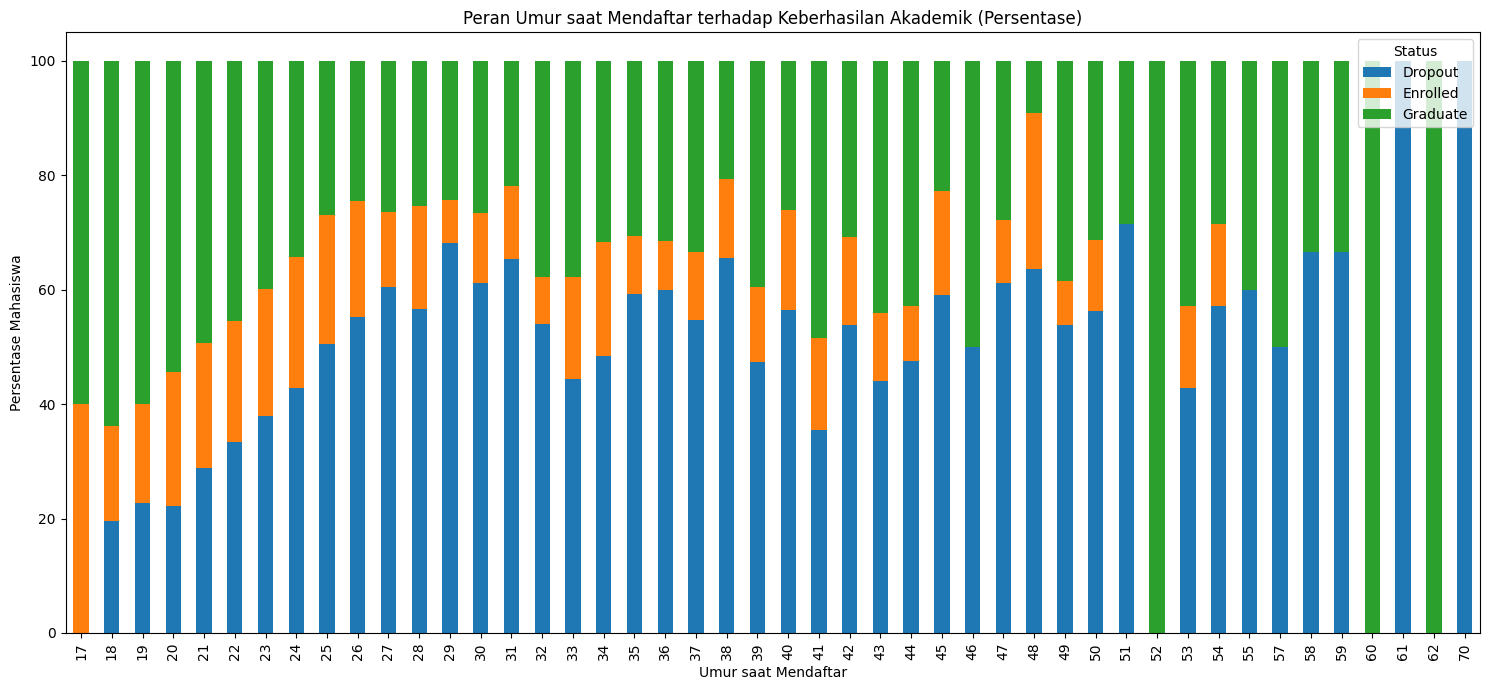

<Figure size 1500x700 with 0 Axes>

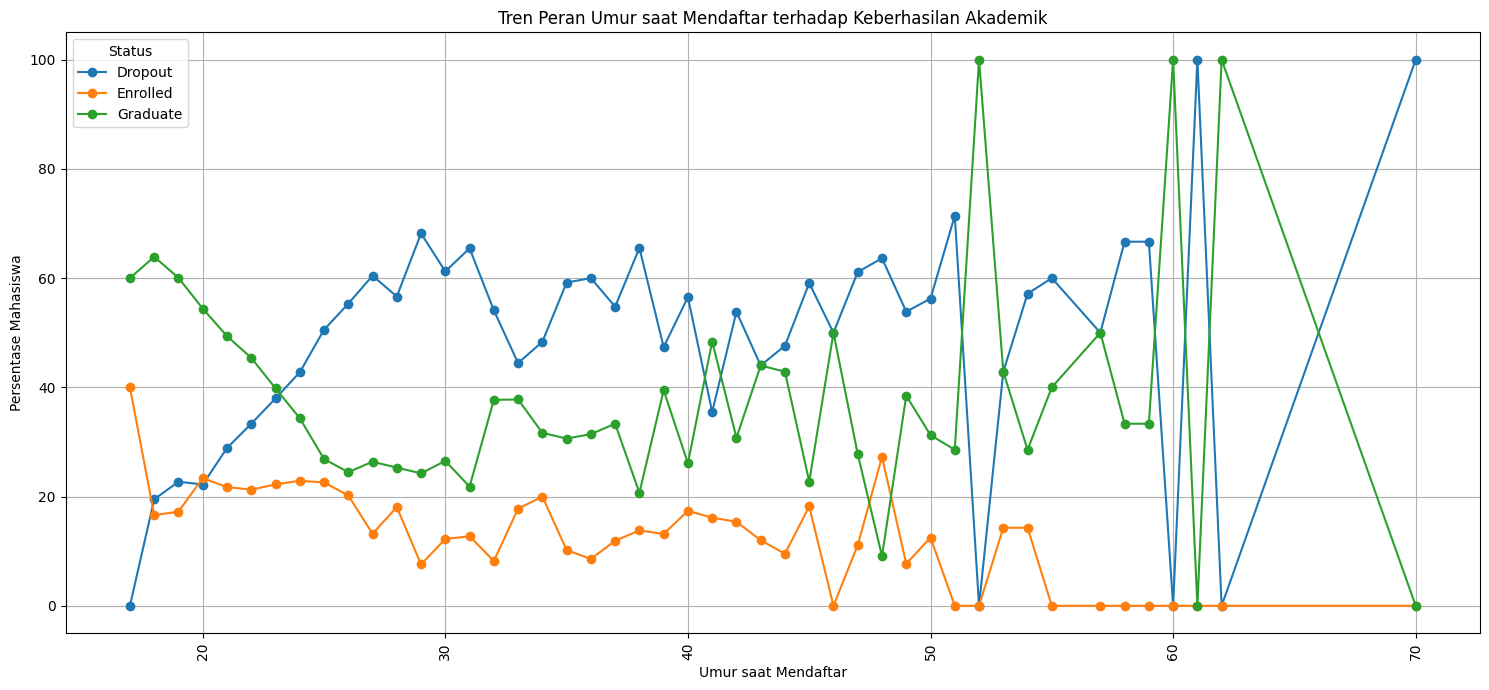

In [12]:
# Mengelompokkan data berdasarkan 'Age_at_enrollment' dan 'Status'
age_status_counts = df.groupby('Age_at_enrollment')['Status'].value_counts().unstack().fillna(0)

# Menghitung persentase status untuk setiap umur
age_status_percentage = age_status_counts.divide(age_status_counts.sum(axis=1), axis=0) * 100

# Visualisasi menggunakan bar plot
plt.figure(figsize=(15, 7))
age_status_percentage.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Peran Umur saat Mendaftar terhadap Keberhasilan Akademik (Persentase)')
plt.xlabel('Umur saat Mendaftar')
plt.ylabel('Persentase Mahasiswa')
plt.xticks(rotation=90)
plt.legend(title='Status')
plt.tight_layout()
plt.show()

# Visualisasi menggunakan line plot (jika ingin melihat tren)
plt.figure(figsize=(15, 7))
age_status_percentage.plot(kind='line', marker='o', figsize=(15, 7))
plt.title('Tren Peran Umur saat Mendaftar terhadap Keberhasilan Akademik')
plt.xlabel('Umur saat Mendaftar')
plt.ylabel('Persentase Mahasiswa')
plt.xticks(rotation=90)
plt.legend(title='Status')
plt.grid(True)
plt.tight_layout()
plt.show()

Jika kita lihat dari visualisasi peran umur dan tingkat kelulusan student, terlihat bahwa usia juga mempengaruhi tingkat kelulusan, jika kita terdapat kenaikan tingkat droput pda usia 20 ke 30 tahunan dan ini cukup signifikan. Secara tidak langsung usia mempengaruhi performa student.
Data tersebut menjawab pertanyaan **nomor 3**

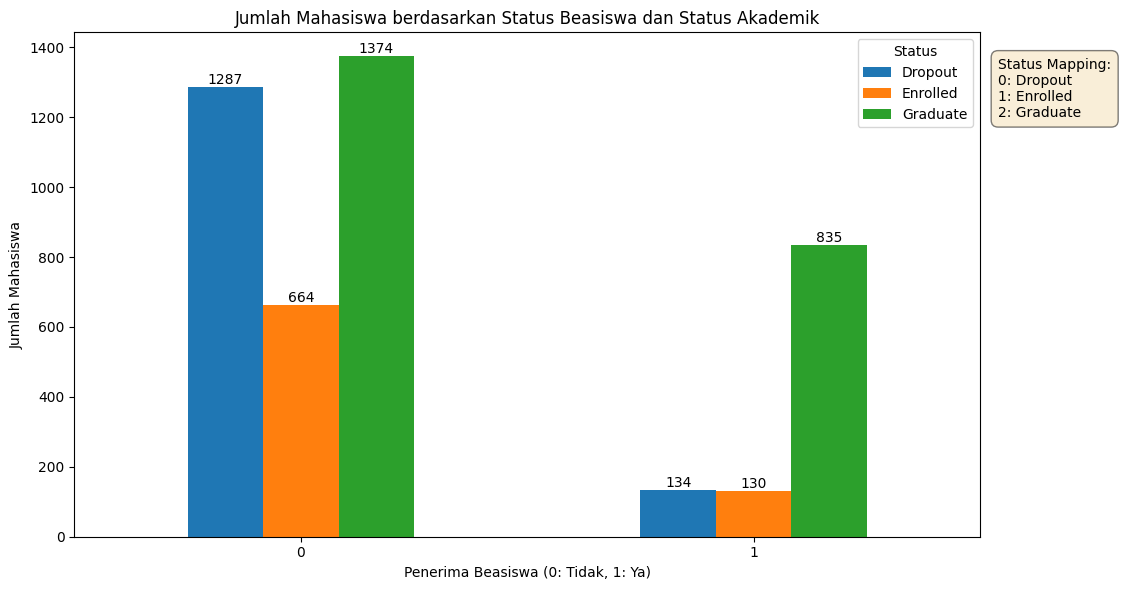

In [13]:
# Membandingkan performa akademik (menggunakan 'Status' sebagai indikator) antara penerima beasiswa dan bukan
scholarship_status = df.groupby('Scholarship_holder')['Status'].value_counts().unstack().fillna(0)

# Menghitung persentase status untuk penerima beasiswa dan bukan
scholarship_status_percentage = scholarship_status.divide(scholarship_status.sum(axis=1), axis=0) * 100


# Atau visualisasi menggunakan grouped bar plot untuk perbandingan yang lebih jelas
ax = scholarship_status.plot(kind='bar', figsize=(10, 6)) # Assign the plot object to ax
plt.title('Jumlah Mahasiswa berdasarkan Status Beasiswa dan Status Akademik')
plt.xlabel('Penerima Beasiswa (0: Tidak, 1: Ya)')
plt.ylabel('Jumlah Mahasiswa')
plt.xticks(rotation=0)
plt.legend(title='Status')
plt.tight_layout()
# Add text annotation for the mapping
annotation_text = "Status Mapping:\n0: Dropout\n1: Enrolled\n2: Graduate"
plt.text(1.02, 0.95, annotation_text, transform=ax.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.show()

Berdasarkan grafik diatas kita dapat melihat bagaimana pengaruh beasiswa terhadap kelulusan. student yang menerima besiswa (1) memilki jumlah graduate yang lebih banyak dari yang dropout hampir 1:8 sedangkan pada student yang tidak menerima beasiswa kita bisa melihat jumlah yang hampir seimbang antara yang graduate (1374) dan yang dropout(1287) artinya pengaruh beasiswa cukup signifikan dalam performance akademik.
data tersebut sekaligus menjawab pertanyaan ke-4

<Figure size 1000x800 with 0 Axes>

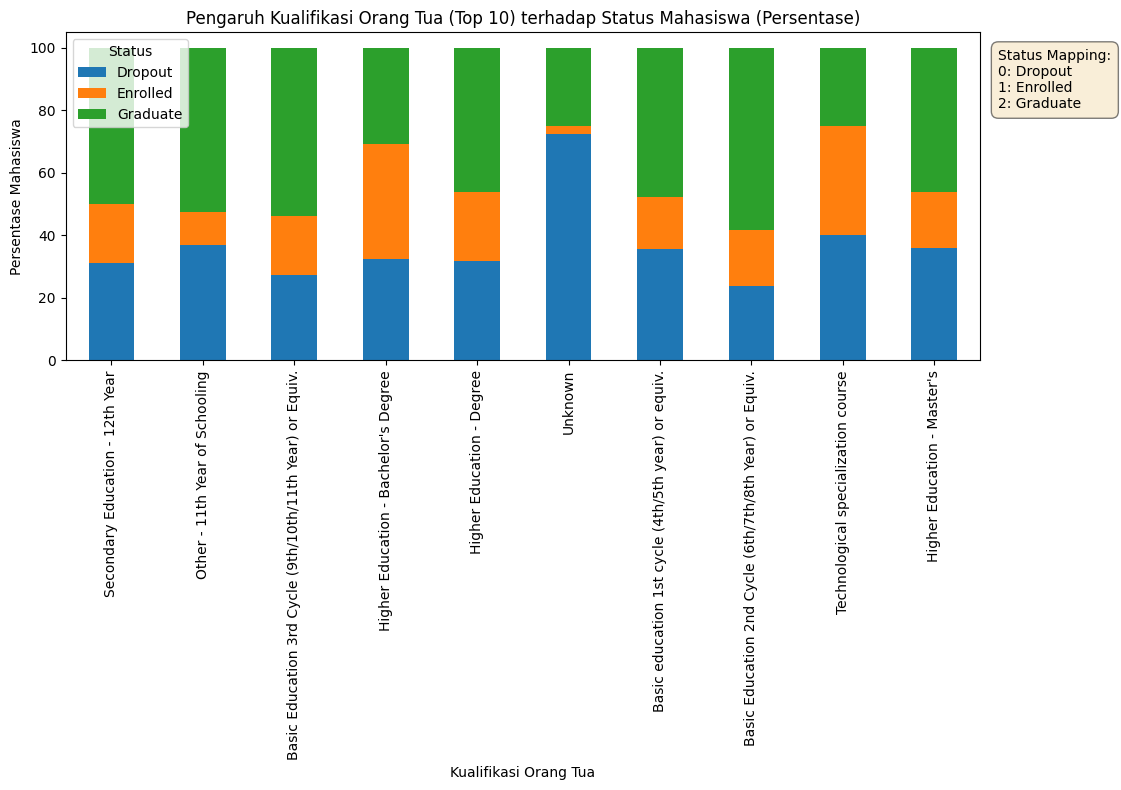

<Figure size 1000x800 with 0 Axes>

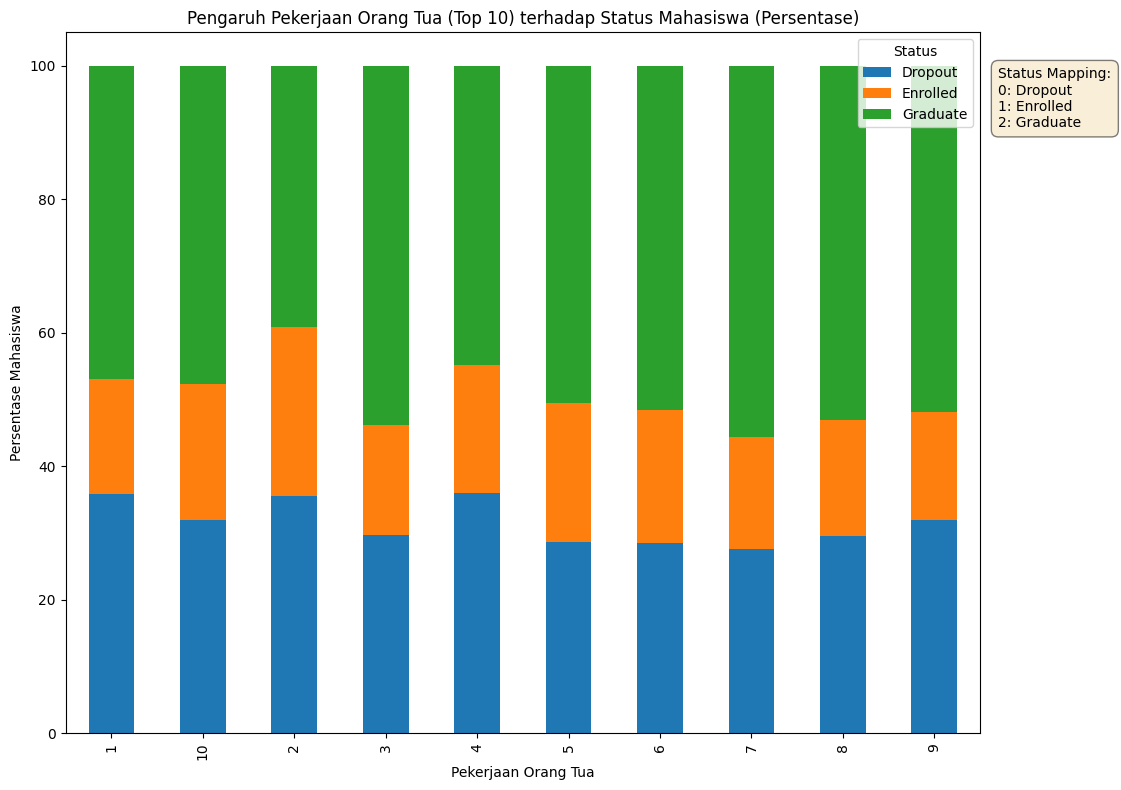

In [14]:
# Menggabungkan kualifikasi ibu dan ayah
df['Parents_qualification'] = df['Fathers_qualification'].astype(str)

# Menggabungkan pekerjaan ibu dan ayah
df['Parents_occupation'] = df['Fathers_occupation'].astype(str)

# Untuk analisis yang lebih mendalam, Anda bisa memilih kualifikasi/pekerjaan yang paling umum
# Contoh: Analisis untuk 10 kualifikasi orang tua paling umum
top_qualifications = df['Parents_qualification'].value_counts().nlargest(10).index
df_top_qualifications = df[df['Parents_qualification'].isin(top_qualifications)]

# Create a dictionary for custom qualification labels using your data
qualification_labels = {
    '1': 'Secondary Education - 12th Year',
    '2': "Higher Education - Bachelor's Degree",
    '3': 'Higher Education - Degree',
    '4': "Higher Education - Master's",
    '5': 'Higher Education - Doctorate',
    '6': 'Frequency of Higher Education',
    '9': '12th Year of Schooling - Not Completed',
    '10': '11th Year of Schooling - Not Completed',
    '11': '7th Year (Old)',
    '12': 'Other - 11th Year of Schooling',
    '13': '2nd year complementary high school course',
    '14': '10th Year of Schooling',
    '18': 'General commerce course',
    '19': 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
    '20': 'Complementary High School Course',
    '22': 'Technical-professional course',
    '25': 'Complementary High School Course - not concluded',
    '26': '7th year of schooling',
    '27': '2nd cycle of the general high school course',
    '29': '9th Year of Schooling - Not Completed',
    '30': '8th year of schooling',
    '31': 'General Course of Administration and Commerce',
    '33': 'Supplementary Accounting and Administration',
    '34': 'Unknown',
    '35': "Can't read or write",
    '36': 'Can read without having a 4th year of schooling',
    '37': 'Basic education 1st cycle (4th/5th year) or equiv.',
    '38': 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
    '39': 'Technological specialization course',
    '40': 'Higher education - degree (1st cycle)',
    '41': 'Specialized higher studies course',
    '42': 'Professional higher technical course',
    '43': 'Higher Education - Master (2nd cycle)',
    '44': 'Higher Education - Doctorate (3rd cycle)'
}

plt.figure(figsize=(10, 8))
qualification_status_counts_top = df_top_qualifications.groupby('Parents_qualification')['Status'].value_counts().unstack().fillna(0)
qualification_status_counts_percentage_top = qualification_status_counts_top.divide(qualification_status_counts_top.sum(axis=1), axis=0) * 100

# Get the sorted list of top qualifications to match the plot order
sorted_top_qualifications = qualification_status_counts_percentage_top.index.tolist()
# Create a list of custom labels in the same order
custom_qualification_labels = [qualification_labels.get(str(qual), str(qual)) for qual in sorted_top_qualifications]


ax_qual = qualification_status_counts_percentage_top.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('Pengaruh Kualifikasi Orang Tua (Top 10) terhadap Status Mahasiswa (Persentase)')
plt.xlabel('Kualifikasi Orang Tua')
plt.ylabel('Persentase Mahasiswa')
plt.xticks(ticks=range(len(custom_qualification_labels)), labels=custom_qualification_labels, rotation=90) # Set custom x-axis labels
plt.legend(title='Status')
plt.tight_layout()

# Add text annotation for the mapping
annotation_text = "Status Mapping:\n0: Dropout\n1: Enrolled\n2: Graduate"
plt.text(1.02, 0.95, annotation_text, transform=ax_qual.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))
plt.show()

# Contoh: Analisis untuk 5 pekerjaan orang tua paling umum
top_occupations = df['Parents_occupation'].value_counts().nlargest(10).index
df_top_occupations = df[df['Parents_occupation'].isin(top_occupations)]

# Create a dictionary for custom occupation labels using your data
occupation_labels = {
    0: 'Student',
    1: "Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
    2: "Specialists in Intellectual and Scientific Activities",
    3: "Intermediate Level Technicians and Professions",
    4: "Administrative staff",
    5: "Personal Services, Security and Safety Workers and Sellers",
    6: "Farmers and Skilled Workers in Agriculture, Fisheries and Forestry",
    7: "Skilled Workers in Industry, Construction and Craftsmen",
    8: "Installation and Machine Operators and Assembly Workers",
    9: "Unskilled Workers",
    10: "Armed Forces Professions",
    90: "Other Situation",
    99: "(blank)",
    101: "Armed Forces Officers",
    102: "Armed Forces Sergeants",
    103: "Other Armed Forces personnel",
    112: "Directors of administrative and commercial services",
    114: "Hotel, catering, trade and other services directors",
    121: "Specialists in the physical sciences, mathematics, engineering and related techniques",
    122: "Health professionals",
    123: "Teachers",
    124: "Specialists in finance, accounting, administrative organization, public and commercial relations",
    131: "Intermediate level science and engineering technicians and professions",
    132: "Technicians and professionals, of intermediate level of health",
    134: "Intermediate level technicians from legal, social, sports, cultural and similar services",
    135: "Information and communication technology technicians",
    141: "Office workers, secretaries in general and data processing operators",
    143: "Data, accounting, statistical, financial services and registry-related operators",
    144: "Other administrative support staff",
    151: "Personal service workers",
    152: "Sellers",
    153: "Personal care workers and the like",
    154: "Protection and security services personnel",
    161: "Market-oriented farmers and skilled agricultural and animal production workers",
    163: "Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence",
    171: "Skilled construction workers and the like, except electricians",
    172: "Skilled workers in metallurgy, metalworking and similar",
    174: "Skilled workers in electricity and electronics",
    175: "Workers in food processing, woodworking, clothing and other industries and crafts",
    181: "Fixed plant and machine operators",
    182: "Assembly workers",
    183: "Vehicle drivers and mobile equipment operators",
    192: "Unskilled workers in agriculture, animal production, fisheries and forestry",
    193: "Unskilled workers in extractive industry, construction, manufacturing and transport",
    194: "Meal preparation assistants",
    195: "Street vendors (except food) and street service providers"
}

plt.figure(figsize=(10, 8))
occupation_status_counts_top = df_top_occupations.groupby('Parents_occupation')['Status'].value_counts().unstack().fillna(0)
occupation_status_counts_percentage_top = occupation_status_counts_top.divide(occupation_status_counts_top.sum(axis=1), axis=0) * 100

# Get the sorted list of top occupations to match the plot order
sorted_top_occupations = occupation_status_counts_percentage_top.index.tolist()
# Create a list of custom labels in the same order
custom_occupation_labels = [occupation_labels.get(str(occ), str(occ)) for occ in sorted_top_occupations]


ax_occ = occupation_status_counts_percentage_top.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('Pengaruh Pekerjaan Orang Tua (Top 10) terhadap Status Mahasiswa (Persentase)')
plt.xlabel('Pekerjaan Orang Tua')
plt.ylabel('Persentase Mahasiswa')
plt.xticks(ticks=range(len(custom_occupation_labels)), labels=custom_occupation_labels, rotation=90) # Set custom x-axis labels
plt.legend(title='Status')
plt.tight_layout()

# Add text annotation for the mapping
annotation_text = "Status Mapping:\n0: Dropout\n1: Enrolled\n2: Graduate"
plt.text(1.02, 0.95, annotation_text, transform=ax_occ.transAxes, fontsize=10,
         verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))
plt.show()

berdasarkan dua grafik diatas tengan pengaruh pekerjaan dan pendidikan orang tua terlihat bahwa pengaruh kualifikasi pendidikan orang tua secara fluktuatif berpengaruh terhadap status student, hal ini dapat disebakan karna faktor ekonomi yang berkaitan dengan biaya kuliahnya, sedangkan pekerjaan orang tua tidak terlalu berpengaruh terhadap status mahasiswa

In [15]:
course_names = {
    33: 'Biofuel Production Technologies',
    171: 'Animation and Multimedia Design',
    8014: 'Social Service (evening attendance)',
    9003: 'Agronomy',
    9070: 'Communication Design',
    9085: 'Veterinary Nursing',
    9119: 'Informatics Engineering',
    9130: 'Equinculture',
    9147: 'Management',
    9238: 'Social Service',
    9254: 'Tourism',
    9500: 'Nursing',
    9556: 'Oral Hygiene',
    9670: 'Advertising and Marketing Management',
    9773: 'Journalism and Communication',
    9853: 'Basic Education',
    9991: 'Management (evening attendance)'
}

df_dropout = df[df['Status'] == 0]

if not df_dropout.empty:
    dropout_by_course = df_dropout['Course'].value_counts()

    # Map course IDs to names for better readability on the plot
    # Get the course names for the dropout courses based on the index of the value counts
    dropout_course_labels = [course_names.get(course_id, str(course_id)) for course_id in dropout_by_course.index]


    # Visualisasikan jumlah mahasiswa dropout per mata kuliah
    plt.figure(figsize=(18, 8)) # Increase figure size for better label spacing
    ax1 = dropout_by_course.plot(kind='bar') # Assign the plot object to ax1
    plt.title('Jumlah Mahasiswa Dropout per Program Studi')
    plt.xlabel('Mata Kuliah')
    plt.ylabel('Jumlah Mahasiswa Dropout')
    plt.xticks(ticks=range(len(dropout_by_course.index)), labels=dropout_course_labels, rotation=90) # Set custom labels
    plt.tight_layout()
    plt.show()
else:
    print("No dropout students found in the filtered data.")


No dropout students found in the filtered data.


Dapat kita lihat berdasarkan hasil visualisasi jumlah mahasiswa yang dropout berdasarkan program studi yang paling tinggi adalah prodi Management(kelas sore/karyawan), disusul management dan nursing.  

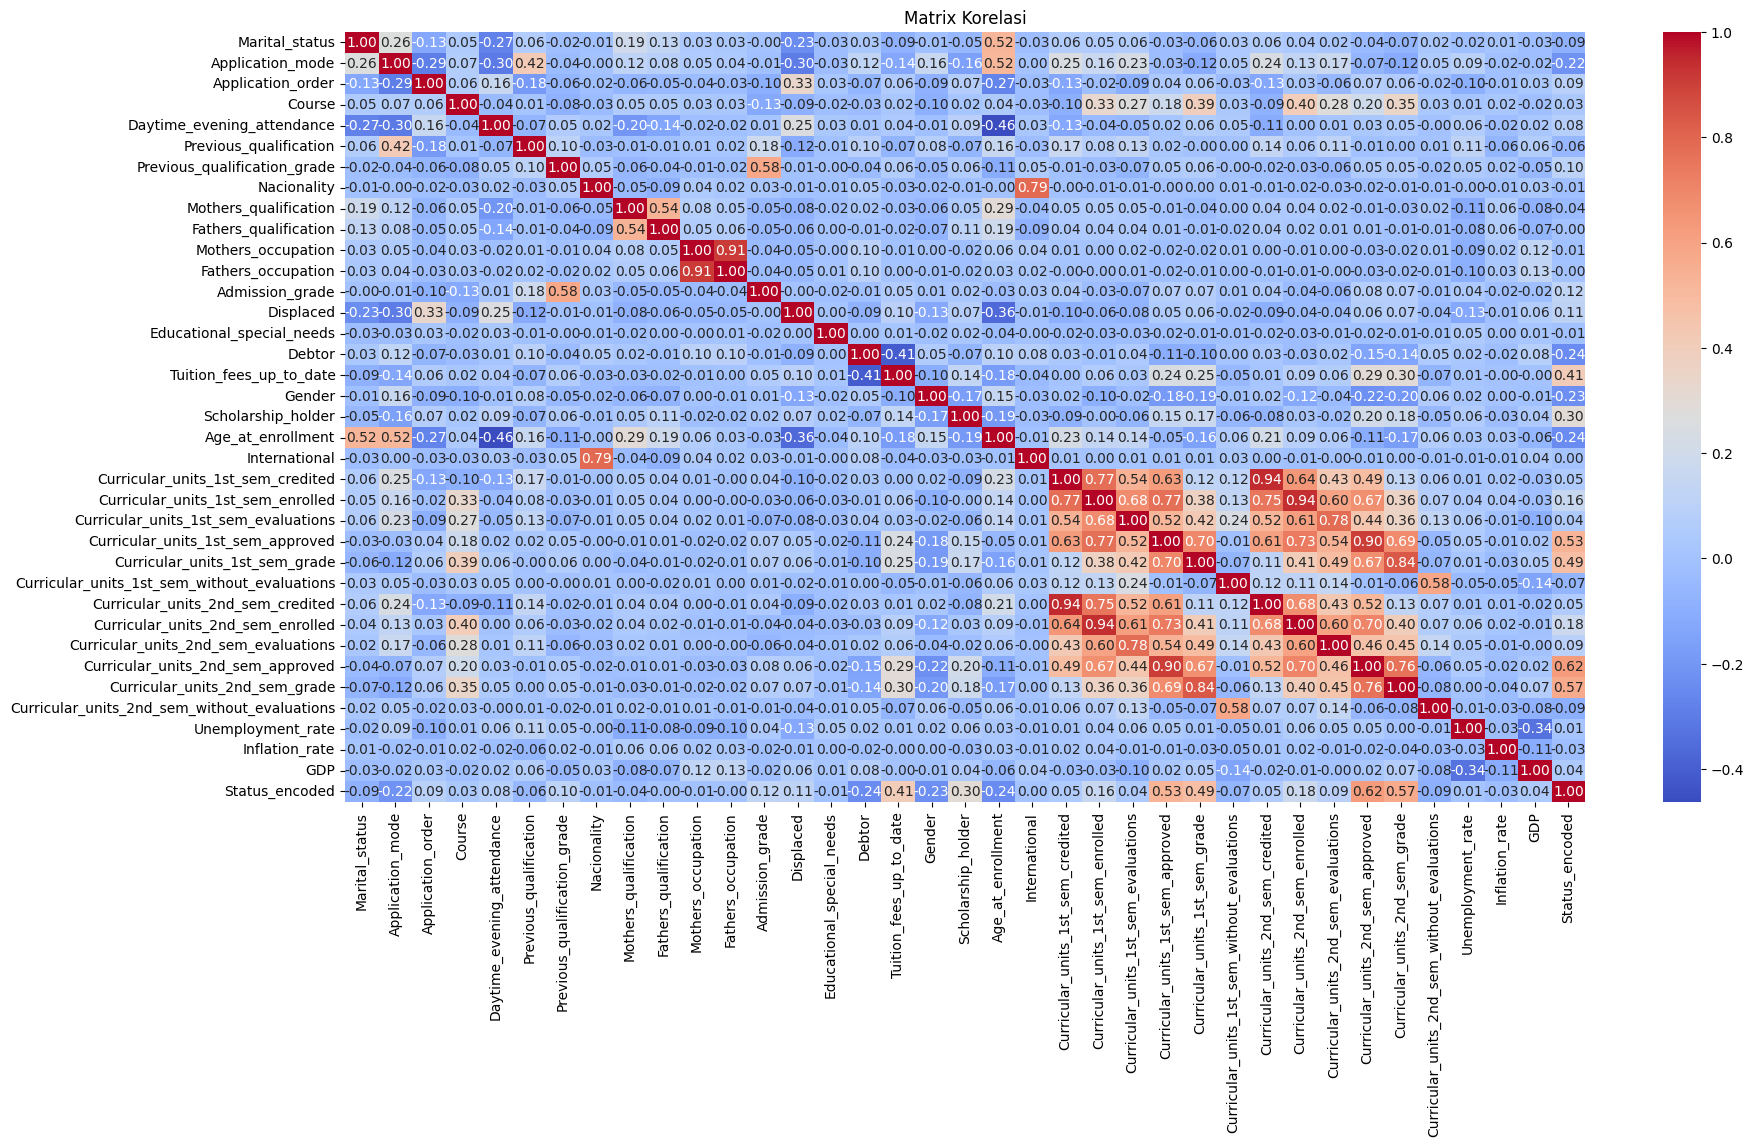

In [16]:
plt.figure(figsize=(20, 10))
correlation_matrix = df.corr(numeric_only=True) # Calculate correlation matrix for numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrix Korelasi')
plt.show()


Pada heatmap korelasi tersebut dapat dilihat gambaran hubungan antar fitur dimana semakin terang berwarna merah semakin tiggi korelasinya.

## Data Preparation / Preprocessing

In [17]:
# prompt: hapus data dengan value status 1

df_filtered = df[df['Status'] != 1].copy()

print(f"Jumlah baris sebelum penghapusan: {len(df)}")
print(f"Jumlah baris setelah penghapusan data dengan Status 1: {len(df_filtered)}")

Jumlah baris sebelum penghapusan: 4424
Jumlah baris setelah penghapusan data dengan Status 1: 4424


In [18]:

columns_to_drop = [
    "Nacionality",
    "Mothers_qualification",
    "Fathers_qualification",
    "Mothers_occupation",
    "Fathers_occupation",
    "Course",
    "Educational_special_needs",
    "Unemployment_rate",
    "Inflation_rate",
    "International",
    "GDP",
    "Status_encoded",
    "Displaced"
]

# Drop the specified columns
df_new= df_filtered.drop(columns=columns_to_drop, errors='ignore') # Use errors='ignore' to avoid errors if a column is not found

print(f"Jumlah kolom sebelum penghapusan: {df_filtered.shape[1]}")
print(f"Jumlah kolom setelah penghapusan: {df_new.shape[1]}")
print("Kolom yang tersisa:")
print(df_new.columns.tolist())


Jumlah kolom sebelum penghapusan: 40
Jumlah kolom setelah penghapusan: 27
Kolom yang tersisa:
['Marital_status', 'Application_mode', 'Application_order', 'Daytime_evening_attendance', 'Previous_qualification', 'Previous_qualification_grade', 'Admission_grade', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Status', 'Parents_qualification', 'Parents_occupation']


In [19]:
# prompt: cratea label encoder for status

status_encoder = LabelEncoder()
df_new['Status'] = status_encoder.fit_transform(df_new['Status'])

In [20]:
df_new['Status'] = df_new['Status'].replace(2, 1)

In [21]:
X = df_new.drop('Status', axis=1) # Features
y = df_new['Status']             # Target
df_new.head()

,Marital_status,Application_mode,Application_order,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Admission_grade,Debtor,Tuition_fees_up_to_date,Gender,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status,Parents_qualification,Parents_occupation
0,1,17,5,1,1,122.0,127.3,0,1,1,...,0,0,0,0,0,0.000000,0,0,12,9
1,1,15,1,1,1,160.0,142.5,0,0,1,...,0,0,6,6,6,13.666667,0,1,3,3
2,1,1,5,1,1,122.0,124.8,0,0,1,...,0,0,6,0,0,0.000000,0,0,37,9
3,1,17,2,1,1,122.0,119.6,0,1,0,...,0,0,6,10,5,12.400000,0,1,37,3
4,2,39,1,0,1,100.0,141.5,0,1,0,...,0,0,6,6,6,13.000000,0,1,38,9


Bagian ini kita akan menerapkan one hot encoding pada ``status`` menjadi angka numerik, diamana nilai dropout akan diubah menjadi 0, graduate manjadi 1, dan enroll menjadi 2

In [22]:
#hapus data duplikat
df_new = df_new.drop_duplicates()
print(df_new)

      Marital_status  Application_mode  Application_order  \
0                  1                17                  5   
1                  1                15                  1   
2                  1                 1                  5   
3                  1                17                  2   
4                  2                39                  1   
...              ...               ...                ...   
4419               1                 1                  6   
4420               1                 1                  2   
4421               1                 1                  1   
4422               1                 1                  1   
4423               1                10                  1   

      Daytime_evening_attendance  Previous_qualification  \
0                              1                       1   
1                              1                       1   
2                              1                       1   
3                          

Proses ini akan menghapus data duplikat

In [23]:
#Drop missing value
df_new.dropna(inplace=True)
df_new

,Marital_status,Application_mode,Application_order,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Admission_grade,Debtor,Tuition_fees_up_to_date,Gender,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status,Parents_qualification,Parents_occupation
0,1,17,5,1,1,122.0,127.3,0,1,1,...,0,0,0,0,0,0.000000,0,0,12,9
1,1,15,1,1,1,160.0,142.5,0,0,1,...,0,0,6,6,6,13.666667,0,1,3,3
2,1,1,5,1,1,122.0,124.8,0,0,1,...,0,0,6,0,0,0.000000,0,0,37,9
3,1,17,2,1,1,122.0,119.6,0,1,0,...,0,0,6,10,5,12.400000,0,1,37,3
4,2,39,1,0,1,100.0,141.5,0,1,0,...,0,0,6,6,6,13.000000,0,1,38,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,1,1,125.0,122.2,0,1,1,...,0,0,6,8,5,12.666667,0,1,1,4
4420,1,1,2,1,1,120.0,119.0,1,0,0,...,0,0,6,6,2,11.000000,0,0,1,9
4421,1,1,1,1,1,154.0,149.5,0,1,0,...,0,0,8,9,1,13.500000,0,0,37,9
4422,1,1,1,1,1,180.0,153.8,0,1,0,...,0,0,5,6,5,12.000000,0,1,37,4


selanjutnya kita akan menghapus nilai yang kosong

In [24]:

X = df_new.drop('Status', axis=1) # Features (all columns except 'Status')
y = df_new['Status']             # Target variable ('Status')

print("Features (X) shape:", X.shape)
print("Target variable (y) shape:", y.shape)


Features (X) shape: (4424, 26)
Target variable (y) shape: (4424,)


Pada tahapan ini kita akan membagi fitur dan target, dimana fitur ``status`` akan menjadi target fitur

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (3539, 26)
X_test shape: (885, 26)
y_train shape: (3539,)
y_test shape: (885,)


selanjutnya kita akan membagi data kedalam data training dan data testing dengan perbandingan 80% data training dan 20 data testing

## Modeling

### Random Forest

In [26]:
# Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=12)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
# ## Saving the Model
dump(model, 'random_forest_model.joblib')

['random_forest_model.joblib']

selajutnya kita akan melakukan training dengan algoritma random fores dan menyimpan modelnya kedalam file bernama random_forest_model.joblib

###Logistik Regression

In [27]:
from sklearn.linear_model import LogisticRegression
model_logit = LogisticRegression(multi_class = 'ovr')
model_logit.fit(X_train,y_train)
y_pred_logit = model_logit.predict(X_test)
# ## Saving the Model
dump(model, 'logistik_regression_model.joblib')

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['logistik_regression_model.joblib']

akan melakukan training dengan algoritma random fores dan menyimpan modelnya kedalam file bernama logistik_regression_model.joblib

## Evaluation

###Random Forest

In [28]:
# ## Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.88      0.69      0.77       316
           1       0.85      0.95      0.89       569

    accuracy                           0.86       885
   macro avg       0.86      0.82      0.83       885
weighted avg       0.86      0.86      0.85       885



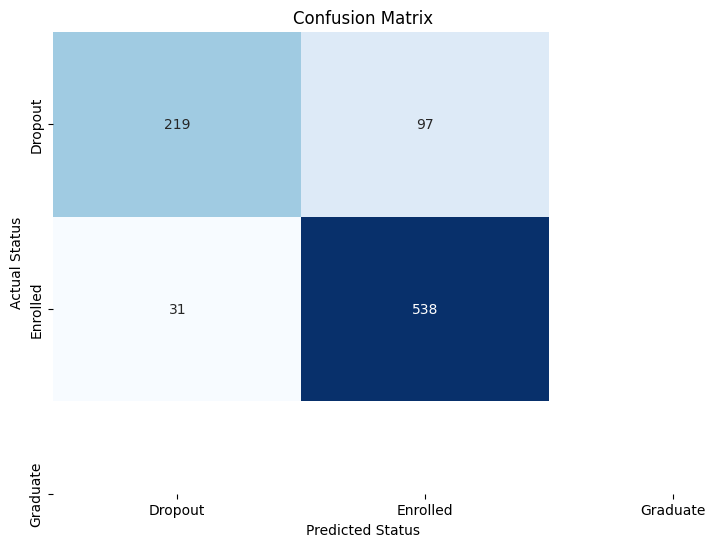

In [31]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=status_encoder.classes_,  # Use original class names
            yticklabels=status_encoder.classes_)  # Use original class names
plt.xlabel('Predicted Status')
plt.ylabel('Actual Status')
plt.title('Confusion Matrix')
plt.show()

Hasil evaluasi confusion matrix dari model random forest menunjukan tingkat akurasi 86% artinya antara nilai prediksi dan nilai sebenarnya berhasil di prediksi dengan baik

###Logistik Regresions

In [32]:
cr = classification_report(y_pred_logit,y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.70      0.86      0.77       258
           1       0.94      0.85      0.89       627

    accuracy                           0.85       885
   macro avg       0.82      0.86      0.83       885
weighted avg       0.87      0.85      0.86       885



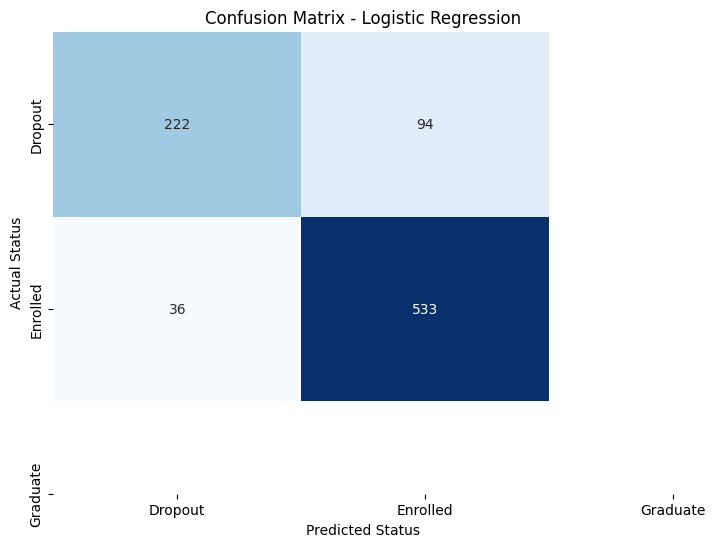

In [34]:
cm_logit = confusion_matrix(y_test, y_pred_logit)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logit, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=status_encoder.classes_,  # Use original class names
            yticklabels=status_encoder.classes_)  # Use original class names
plt.xlabel('Predicted Status')
plt.ylabel('Actual Status')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Hasil evaluasi model logistik regression menunjukan bahwa model bisa mengklasifikasikan dengan baik nilai akurasinya adalah 85%

In [35]:
# Export to CSV
df.to_csv('cleaned_data.csv', index=False)
print("Cleaned data exported to 'cleaned_data.csv'")

# Export to Excel
# !pip install openpyxl # Uncomment and run if you don't have openpyxl installed
df.to_excel('cleaned_data.xlsx', index=False)
print("Cleaned data exported to 'cleaned_data.xlsx'")

# Export to JSON
df.to_json('cleaned_data.json', orient='records', indent=2)
print("Cleaned data exported to 'cleaned_data.json'")

Cleaned data exported to 'cleaned_data.csv'
Cleaned data exported to 'cleaned_data.xlsx'
Cleaned data exported to 'cleaned_data.json'


In [ ]:
!pip freeze > requirements.txt